In [2]:
import pandas as pd
df = pd.read_csv("data.csv")
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [2]:
import sys
!{sys.executable} -m pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.7 MB 15.0 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 13.6 MB/s  0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -- ------------------------------------- 2.9/38.6 MB 14.0 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.6 MB 15.5 MB/s eta 0:00:03
   ---------- ----------------------------- 9.7/38.6 MB 15.5 MB/s eta 0:00:02
   ------------- -------------------------- 13.1/38.6 MB 15.8 MB/s eta 0:00:02
   ----------------- ---------------------- 16.5/38.6 MB 15.8 MB/s eta 0:00:02
   -------------------- ------------------- 19.7/38.6 MB 15.9 MB/s eta 0:00:02
   ----------------------- ---------------- 23.1/38.6 MB 15.7 MB/s eta 0:00:01
   ---

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams["figure.dpi"] = 120

In [ ]:
# Load + select columns 
df = pd.read_csv("data.csv")
num_cols = ["Engine HP","Engine Cylinders","highway MPG","city mpg","Year","Popularity"]
cat_cols = ["Make","Driven_Wheels"]
target = "MSRP"
df = df[num_cols + cat_cols + [target]].dropna().copy()

# Split once, reuse everywhere
X = df[num_cols + cat_cols]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Path("figures").mkdir(exist_ok=True)

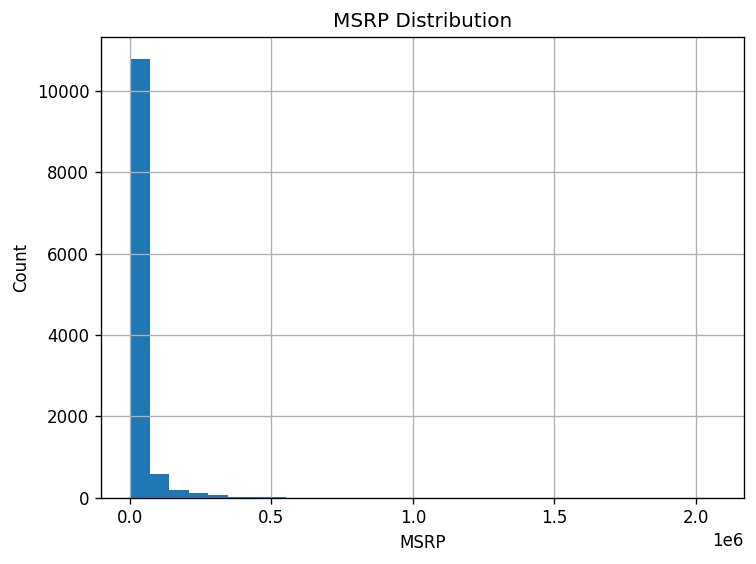

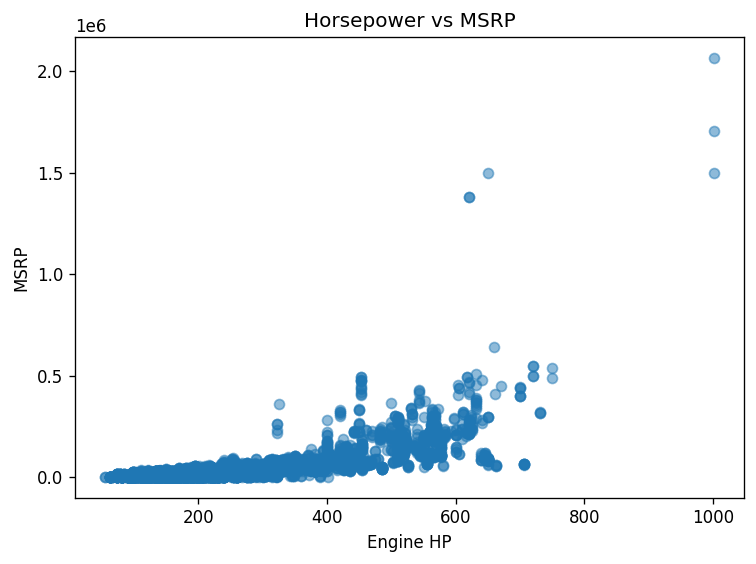

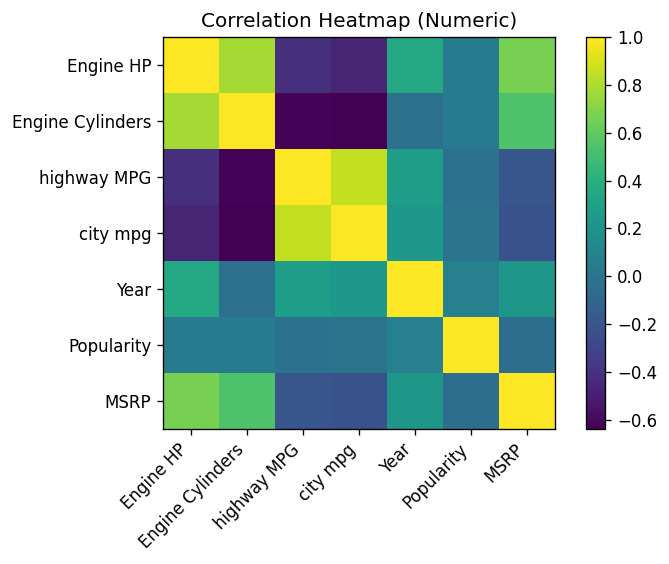

In [15]:
# MSRP histogram
plt.figure(); df[target].hist(bins=30)
plt.title("MSRP Distribution"); plt.xlabel("MSRP"); plt.ylabel("Count")
plt.tight_layout(); plt.savefig("figures/exp1_hist_target.png"); plt.show()

# Horsepower vs MSRP
plt.figure(); plt.scatter(df["Engine HP"], df[target], alpha=0.5)
plt.title("Horsepower vs MSRP"); plt.xlabel("Engine HP"); plt.ylabel("MSRP")
plt.tight_layout(); plt.savefig("figures/exp1_hp_vs_msrp.png"); plt.show()

# Correlation heatmap (numeric)
corr = df[num_cols + [target]].corr(numeric_only=True)
plt.figure(); plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric)"); plt.colorbar()
plt.tight_layout(); plt.savefig("figures/exp1_corr_heatmap.png"); plt.show()



In [16]:
def eval_and_plots(name, model, X_te, y_te, prefix):
    pred = model.predict(X_te)
    rmse = np.sqrt(mean_squared_error(y_te, pred))
    r2 = r2_score(y_te, pred)
    print(f"{name} → RMSE(test): {rmse:,.2f} | R²(test): {r2:.3f}")

    # Pred vs Actual
    plt.figure(); plt.scatter(y_te, pred, alpha=0.5)
    plt.xlabel("Actual MSRP"); plt.ylabel("Predicted MSRP"); plt.title(f"{prefix}: Predicted vs Actual")
    plt.tight_layout(); plt.savefig(f"figures/{prefix}_pred_vs_actual.png"); plt.show()

    # Residuals histogram
    res = y_te - pred
    plt.figure(); plt.hist(res, bins=30)
    plt.title(f"{prefix}: Residuals Distribution"); plt.xlabel("Residual"); plt.ylabel("Count")
    plt.tight_layout(); plt.savefig(f"figures/{prefix}_residuals_hist.png"); plt.show()

    return float(rmse), float(r2)



In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def eval_and_report(name, model, X_te, y_te, save_prefix=None):
    pred = model.predict(X_te)

    # Compute RMSE manually (works in every sklearn version)
    mse = mean_squared_error(y_te, pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_te, pred)

    print(f"{name} → RMSE(test): {rmse:,.2f} | R²(test): {r2:.3f}")

    # Optional graphs
    if save_prefix:
        plt.figure()
        plt.scatter(y_te, pred, alpha=0.5)
        plt.xlabel("Actual MSRP"); plt.ylabel("Predicted MSRP")
        plt.title(f"{save_prefix}: Predicted vs Actual")
        plt.tight_layout(); plt.savefig(f"figures/{save_prefix}_pred_vs_actual.png"); plt.show()

        res = y_te - pred
        plt.figure()
        plt.hist(res, bins=30)
        plt.title(f"{save_prefix}: Residuals Histogram")
        plt.xlabel("Residual"); plt.ylabel("Count")
        plt.tight_layout(); plt.savefig(f"figures/{save_prefix}_residuals_hist.png"); plt.show()

    return float(rmse), float(r2)


Exp1 OLS (numeric-only) → RMSE(test): 41,348.53 | R²(test): 0.457


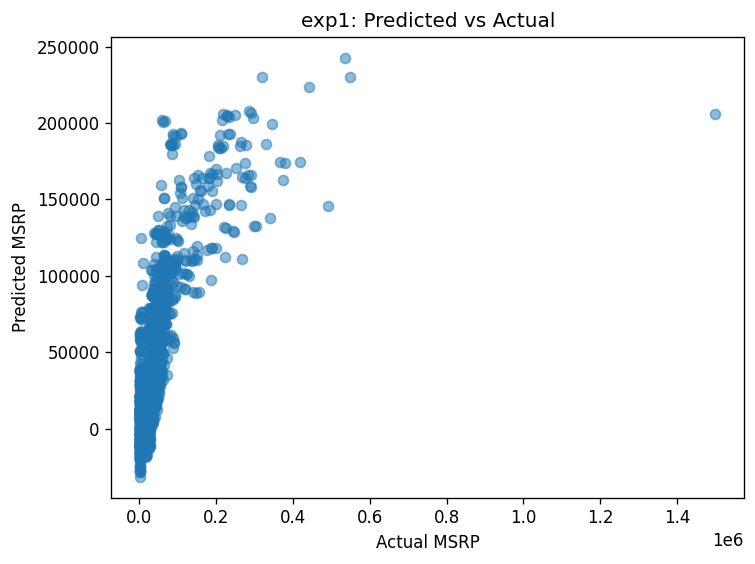

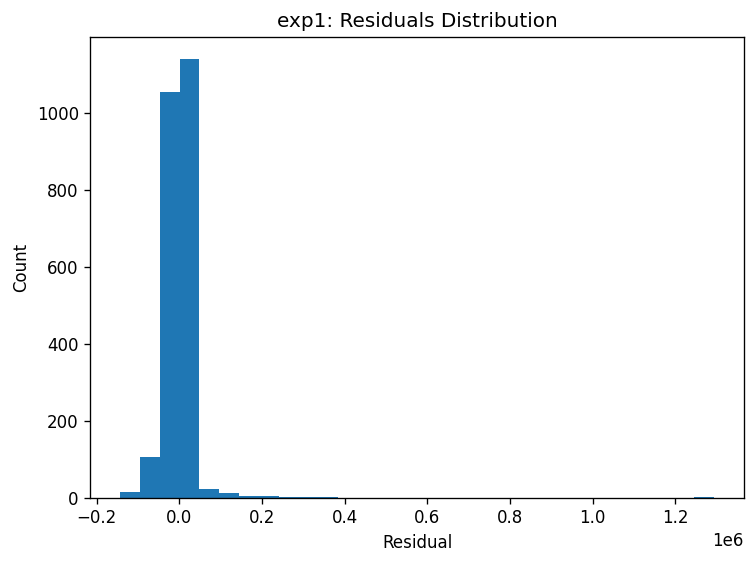

(41348.53251753729, 0.4568246157858128)

In [17]:
X1_train = X_train[num_cols]; X1_test = X_test[num_cols]
exp1 = Pipeline([("model", LinearRegression())]).fit(X1_train, y_train)
rmse1, r21 = eval_and_plots("Exp1 OLS (numeric-only)", exp1, X1_test, y_test, "exp1")
rmse1, r21



Exp2 OLS (scaled + brand OHE) → RMSE(test): 30,767.89 | R²(test): 0.699


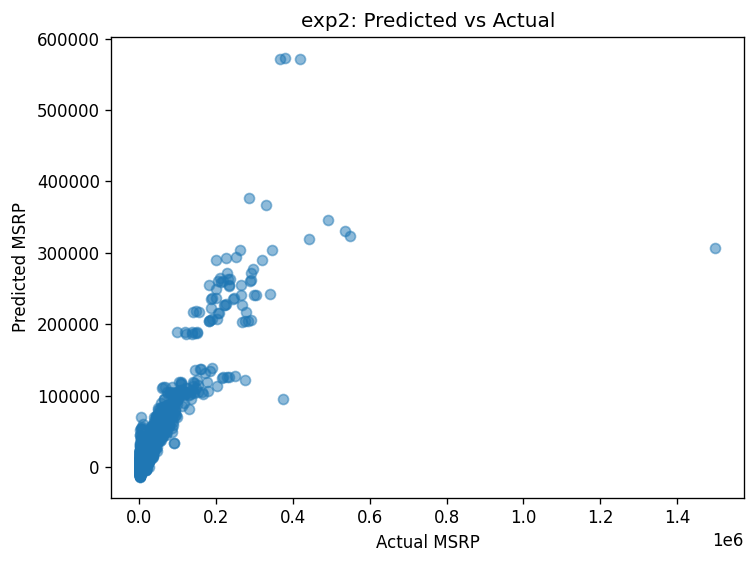

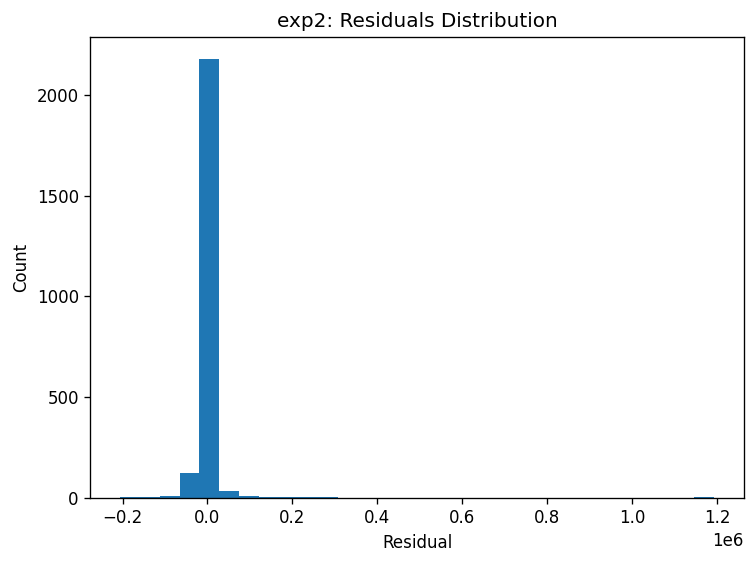

(30767.88985478937, 0.6992433055355513)

In [18]:
pre2 = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

exp2 = Pipeline([("pre", pre2), ("model", LinearRegression())]).fit(X_train, y_train)
rmse2, r22 = eval_and_plots("Exp2 OLS (scaled + brand OHE)", exp2, X_test, y_test, "exp2")
rmse2, r22


Exp3 RandomForest → RMSE(test): 25,029.34 | R²(test): 0.801


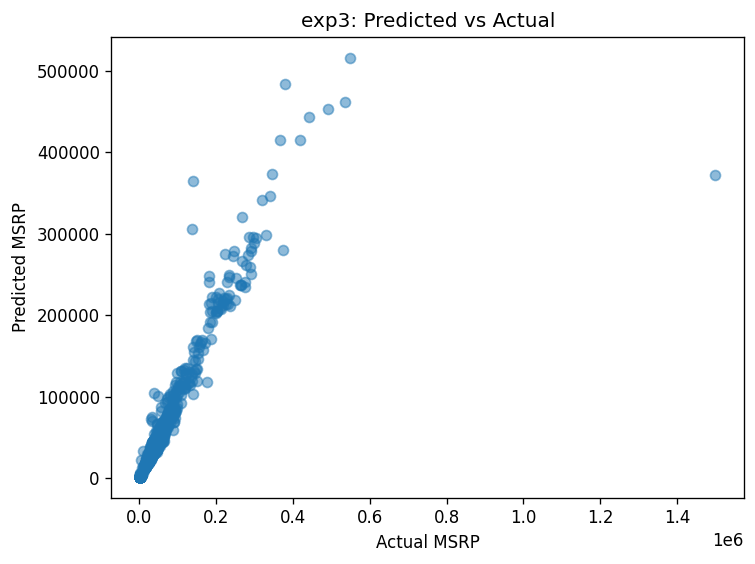

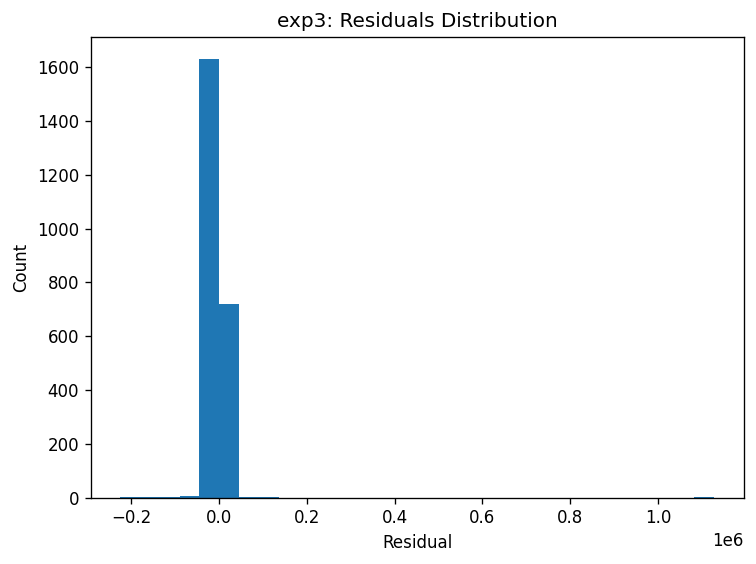

(25029.34176264499, 0.8009699118144039)

In [19]:
rf = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
exp3 = Pipeline([("pre", pre2), ("model", rf)]).fit(X_train, y_train)
rmse3, r23 = eval_and_plots("Exp3 RandomForest", exp3, X_test, y_test, "exp3")
rmse3, r23


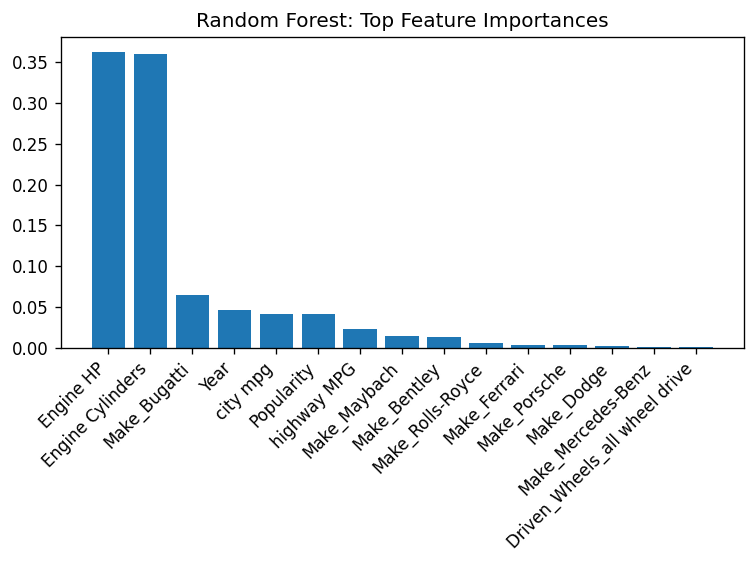

In [20]:
try:
    cat_names = exp3.named_steps["pre"].named_transformers_["cat"].get_feature_names_out(cat_cols)
    feat_names = np.r_[num_cols, cat_names]
    importances = exp3.named_steps["model"].feature_importances_
    order = np.argsort(importances)[::-1][:15]

    plt.figure(); plt.bar(range(len(order)), importances[order])
    plt.xticks(range(len(order)), feat_names[order], rotation=45, ha="right")
    plt.title("Random Forest: Top Feature Importances")
    plt.tight_layout(); plt.savefig("figures/exp3_feature_importances.png"); plt.show()
except Exception as e:
    print("Could not compute importances:", e)
